# Autism Prediction Using Machine Learning

This notebook aims to build a machine learning model to predict the likelihood of Autism Spectrum Disorder (ASD) based on questionnaire responses and demographic information.

## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

sb.set_theme(style="whitegrid")

## 2. Load and Inspect Data
* info()
* describe()
* isnull().sum()
* value_counts() # Distributions of Catgeorical Columns
* head() # First few rows of the data


In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
# Check for missing values
print(df.isnull().sum())


ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


### Use info() to get a quick rundown on the data types especially the  categorical columns, you can get a good feel on which categorical columns and what numerical columns you wonna use together to get those most value and information out of your data. Here's a good place to check if your columns are spelled correctly also.

In [5]:
# Checking the data types and non-null counts.
# Objects are typically strings or mixed types, while floats and ints are numerical.
# This helps in understanding the structure of the dataset and identifying any potential issues with data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
# Descriptive statistics of the dataset
# This provides a summary of the central tendency, dispersion, and shape of the dataset's distribution
# including count, mean, standard deviation, min, max, and quartiles for numerical columns.
# This is useful for understanding the distribution of the data and identifying any potential outliers or anomalies.
# The ID column is dropped as it is not relevant for the analysis.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
# Check for duplicate rows
# This helps in identifying any repeated entries in the dataset that may skew the analysis.
df.duplicated().sum()

0

## Tip 1
### Before I get into any heavy cleaning I like to check the Categorical Columns first because those are the usually the  easiest to clean and can be done quickly. So let's check the categorical columns. They also are the most likely to have values that you may need to manipulate or replace. On top of that you can get a quick sneak peak at some distributions if you woud like!

In [100]:
# Using the Value Counts to check categorical columns
# This helps in understanding the unique values present in each categorical column.
# We can also use this to check the distribution of the data.
# We can simulatenously plot the value counts for better visualization.
# just uncomment the line below to plot the value counts.
df['ethnicity'].value_counts()
#df['ethnicity'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
#df['relation'].value_counts()


ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [101]:
# df.['relation'].value_counts()
# This helps in understanding the unique values present in each categorical column.
# We can also use this to check the distribution of the data.
# We can simulatenously plot the value counts for better visualization.
#df['relation'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
df['relation'].value_counts()

relation
Self                        709
Others                       42
Parent                       29
Relative                     18
Health care professional      2
Name: count, dtype: int64

In [8]:
# Check the categroical columns
# This helps in understanding the unique values present in each categorical column.It also helps in understanding the data distribution.
# I also use this to check for ireggular values in the categorical columns outside of the expected values.
# This is useful for data cleaning and preprocessing.
# This the reason I chose to use the replace method to replace the values in the dataframe.
# And map the values  0 and 1 to no and yes respectively in both columns jaundice and autism.

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")
    print(f"Number of unique values in {column}: {df[column].nunique()}\n")


Unique values in gender: ['f' 'm']
Number of unique values in gender: 2

Unique values in ethnicity: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
Number of unique values in ethnicity: 12

Unique values in jaundice: ['no' 'yes']
Number of unique values in jaundice: 2

Unique values in austim: ['no' 'yes']
Number of unique values in austim: 2

Unique values in contry_of_res: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Le

## 3. Data Cleaning

In [37]:
# Machine Learning Models Can only process numerical data.
# Lets replace the yes and no with 1 and 0 in jaundice and autism level columns.
# Lets also replace the ? with 'Others' and 'others' with 'Others'in ethnicity column and relation.
# autism is spelled wrong in the dataset, so we will correct it.
# we also rename the column contry_of_res to country_of_res for consistency.
df.rename(columns={'austim': 'autism'}, inplace=True)
df.rename(columns={'contry_of_res': 'country_of_res'}, inplace=True)
df['jaundice'] = df['jaundice'].replace({'yes': 1, 'no': 0})
df['used_app_before'] = df['used_app_before'].replace({'yes': 1, 'no': 0})
df['autism'] = df['autism'].replace({'yes': 1, 'no': 0})
df['relation'] = df['relation'].replace({'?': 'Others', 'others': 'Others'})
df['ethnicity'] = df['ethnicity'].replace({'?': 'Others', 'others': 'Others'})
df


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,age_group,age_transformed,sum_score
0,1,1,0,1,0,1,0,1,0,1,...,0,Austria,0,6.351166,18 and more,Self,0,31-40,3.667981,1
1,2,0,0,0,0,0,0,0,0,0,...,0,India,0,2.255185,18 and more,Self,0,41-60,3.886716,0
2,3,1,1,1,1,1,1,1,1,1,...,1,United States,0,14.851484,18 and more,Self,1,0-10,2.125892,1
3,4,0,0,0,0,0,0,0,0,0,...,0,United States,0,2.276617,18 and more,Self,0,21-30,3.201198,0
4,5,0,0,0,0,0,0,0,0,0,...,0,South Africa,0,-4.777286,18 and more,Self,0,41-60,3.788856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,0,New Zealand,0,12.999501,18 and more,Self,0,11-20,2.867739,0
796,797,0,1,1,0,0,1,0,1,1,...,0,Cyprus,0,13.561518,18 and more,Self,0,21-30,3.077451,0
797,798,0,0,0,0,0,0,0,0,0,...,0,New Zealand,0,2.653177,18 and more,Self,0,0-10,1.903820,0
798,799,0,0,0,0,0,0,0,0,0,...,0,Canada,0,9.069342,18 and more,Self,0,11-20,2.857292,0


## 4. Exploratory Data Analysis (EDA)
EDA is a crucial step in understanding the characteristics of the data. It involves summarizing the main features
of the data, identifying patterns, and visualizing the data to gain insights. In this case,
EDA will be performed to understand the distribution of the data, identify any outliers, and visualize the relationship
between the variables.
We usually start with Univariate, moved to Bi-Variate then correlation analysis respectively but I am sure you will develop your own style and techniques to achieve reproducible and verifiable results.

### 4.1 Class Distribution
First and Foremost lets check the target columns class distribution.

In [ ]:
# First and Foremost Lets check for Imbalance data in the target column.
# This helps in understanding the distribution of the target variable.

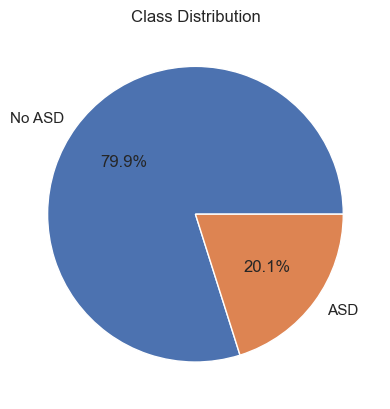

In [10]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%', labels=['No ASD', 'ASD'])
plt.title('Class Distribution')
plt.show()

### Our Target Column is Imbalanced hence the package we imported earlier.
Random OverSampler

### 4.2 Feature Type Grouping
We can group features by data type(int,categorical,float) to visualize more effeciently.

In [14]:
# Seperate the columns into ints, objects, and floats
# This helps in understanding the structure of the dataset and identifying any potential issues with data types.
# We will use this to preprocess the data later.
# We will also remove the target and ID columns from the ints and floats lists.
ints, objects, floats = [], [], []

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

# Remove target and ID
floats.remove('ID')
floats.remove('Class/ASD')
#len(floats)
floats
# I Checked the length of the floats list to see how many columns we have.
# This helps in understanding the structure of the dataset and identifying any potential issues with data types.
# This also helps me in structuring my subplots later.
# Remember that the floats list contains the columns that are not objects.

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'jaundice',
 'autism',
 'result']

In [12]:
# Melt the DataFrame for visualization
# This helps in transforming the DataFrame from wide format to long format.This is necessary for plotting the data.
# Switches Row and Column data
# This is useful for visualizing the data in a more structured way.It helps in plotting the data in a more meaningful way.
# ✅ Why Do We Melt?We melt to facilitate grouped visualizations.In this case, we wanted to plot the distribution of 
# each A-score by class (ASD vs non-ASD). This requires all those columns (A1_Score to A10_Score) to be 
# stacked vertically under a single column so we can group and iterate over them easily.
df_melt = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=floats, var_name='col', value_name='value') 
df_melt


,ID,Class/ASD,col,value
0,1,0,A1_Score,1.000000
1,2,0,A1_Score,0.000000
2,3,1,A1_Score,1.000000
3,4,0,A1_Score,0.000000
4,5,0,A1_Score,0.000000
...,...,...,...,...
11195,796,0,result,12.999501
11196,797,0,result,13.561518
11197,798,0,result,2.653177
11198,799,0,result,9.069342


In [15]:
# Play with the code see what the out of these functions are so you can understand how they work.
# Trace the code to see how it works.
# Execute the cells play around try to understand the code.
for i,col in enumerate(floats):
    print(i,col)

0 A1_Score
1 A2_Score
2 A3_Score
3 A4_Score
4 A5_Score
5 A6_Score
6 A7_Score
7 A8_Score
8 A9_Score
9 A10_Score
10 age
11 jaundice
12 autism
13 result


### 4.3 Distribution of Questionnaire Features

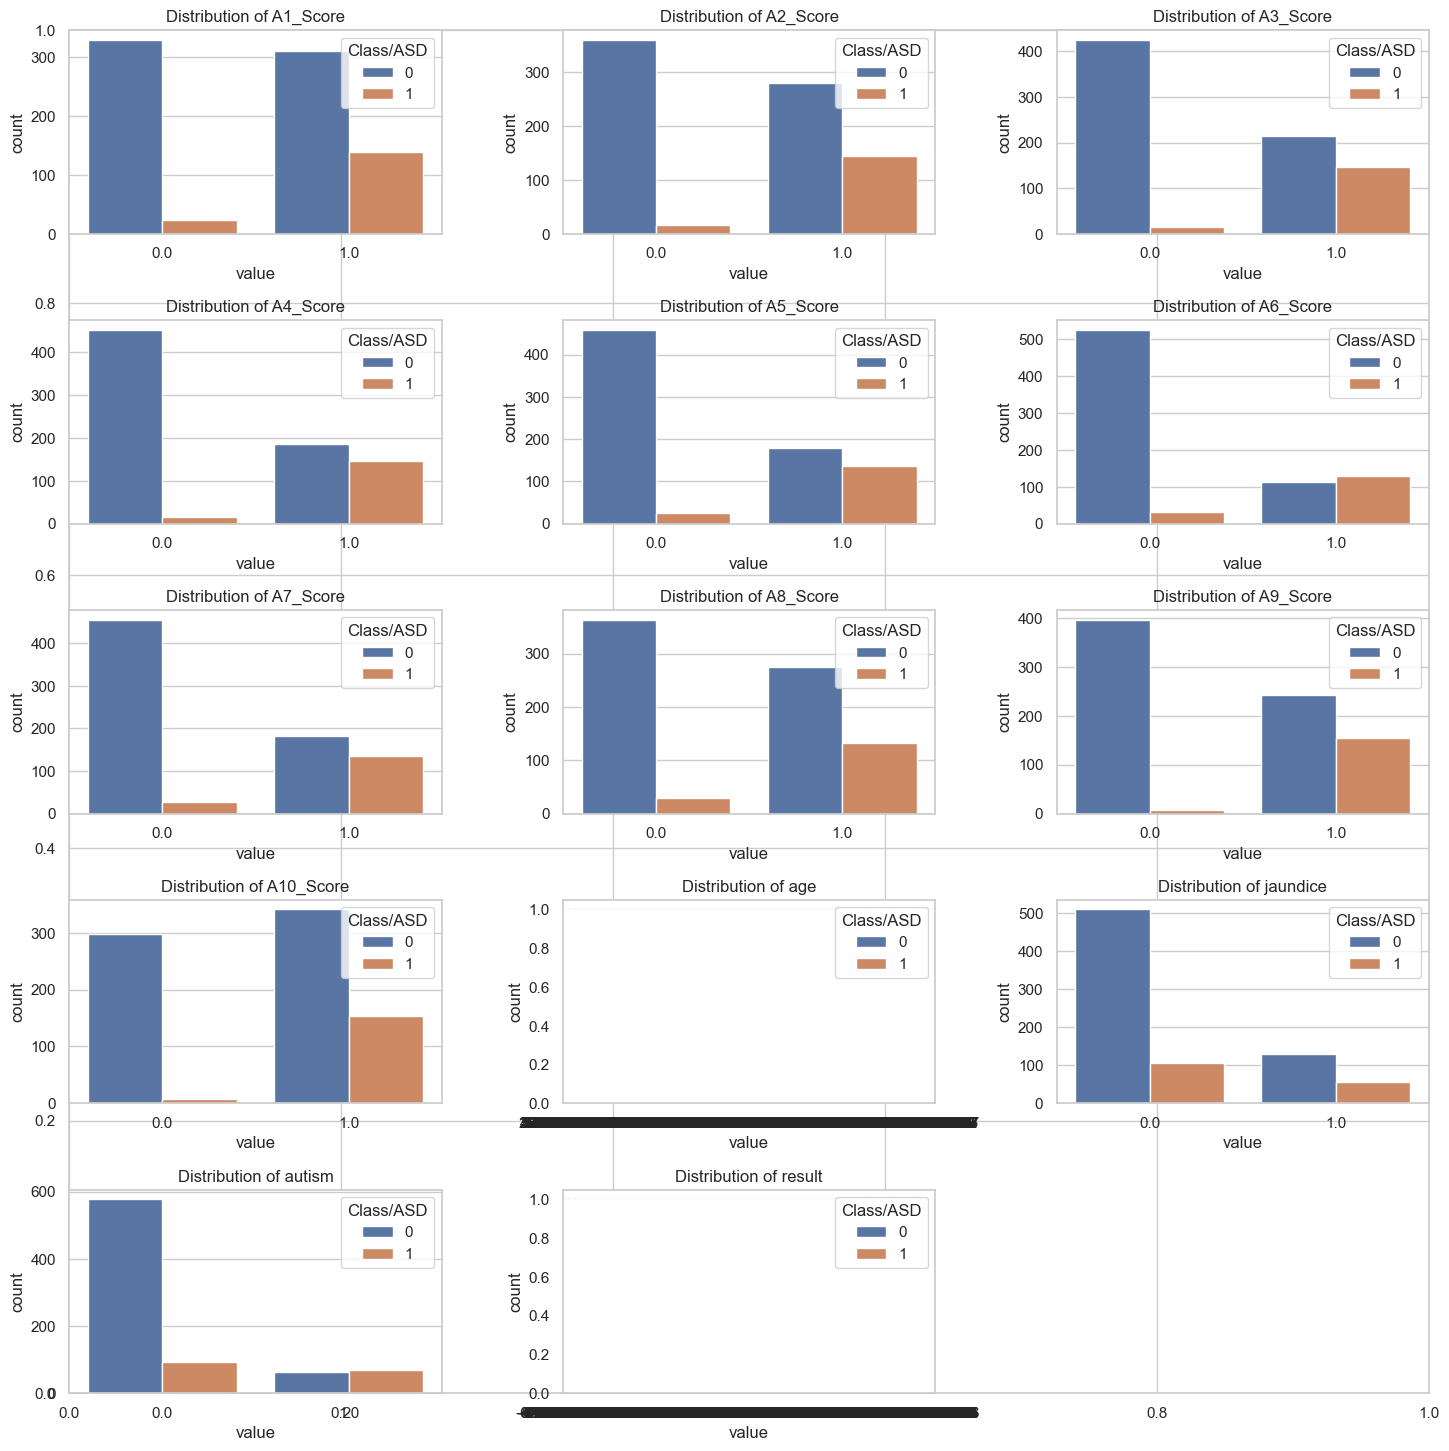

In [16]:
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=floats, var_name='col', value_name='value')
# When we Iterate over the floats list, we can plot the distribution of each column.
# This helps in understanding the distribution of the data and identifying any potential outliers or anomalies. 
# Dont let the Vairable 'Col' Confuse you, it is just a placeholder for the column names in the melted DataFrame.
# It is used to iterate over the floats list and plot the distribution of each column.
# It's Just a For Loops guys, nothing fancy here.
# What do you get statistically from this?
# What I see is that the distribution of each column is plotted against the target variable 'Class/ASD'.
plt.subplots(figsize=(15, 15))
for i, col in enumerate(floats):
    plt.subplot(5, 3, i+1)
    sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 🤔 What Does The Questionaire Numerical Distributions Mean?
🔹 1. Autistic Traits Exist on a Spectrum
Not everyone who scores a 1 is autistic — these traits can appear in neurotypical individuals, just less frequently or intensely. The test captures signals, not definitive diagnoses.
* The Distribution of Traits Across the Population

🔹 2. Single Questions Alone Aren’t Conclusive
Many non-ASD individuals show traits like:
* Look back to the sheet I gave you with descriptions of the questionaire dive into your data. Do they seem bias ?

* Detail orientation (A1)

* Literal thinking (A5)

* Difficulty multitasking (A3)

This reinforces the need to look at patterns across multiple questions, not just one.

🔹 3. Model Needs Combinations
Your ML model must learn that:

It’s not one “yes” answer, but several consistent patterns across A1–A10 that increase the likelihood of ASD.

This is where models like Logistic Regression or XGBoost excel — they find combinations of weak signals that become strong predictors.

📌 Takeaway for Your Intuition


### We really dont get alot of value from age and results column in the barcharts plots from above so lets look at them more closely and plot histograms/boxwhisker charts. Since age is a float and we have to use a histogram it make sense for us to bin the data specifically the age column into categories so we can get a better visualization of the distributions.

<Axes: ylabel='Frequency'>

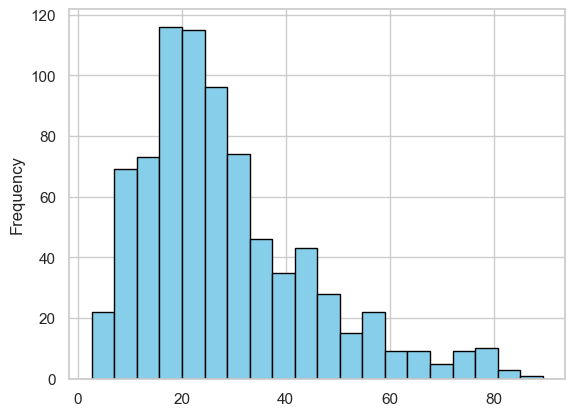

In [95]:
# Lets take a closer look at the distribution of age and result since we cant really see them on the previous plot.
# Age Column is a float, so we can plot it as a histogram.
# This helps in understanding the distribution of the age column and identifying any potential outliers or anomalies
# We can See that the age column is normally distributed with a slight skew to the right.
# This means that most of the data is concentrated around the mean, with a few outlierson the higher end.
# This historgram is somewhat limited so one strategy is to bin the data into smaller intervals to get a better view of the distribution.
df['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

### We use boxplots to identify outliers then we filter out uneccessary rows based on those values that lay below the q1 or above the q3.

Text(0.5, 1.0, 'Box Plot of Age')

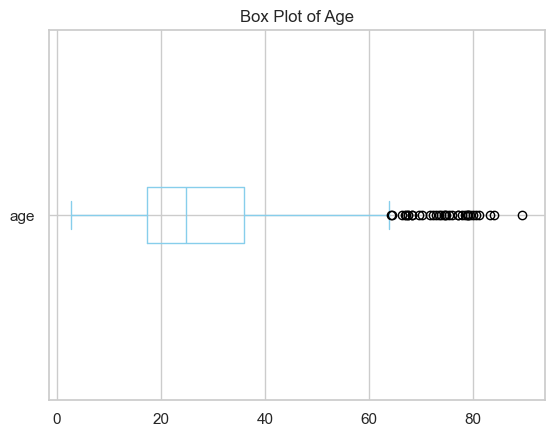

In [96]:
# We can also use a box plot to visualize the distribution of the age column.
# A box plot is a standardized way of displaying the distribution of data based on a five-numbersummary: minimum value, first quartile (Q1), median (Q2), third quartile (Q3), and maximum value.
# The box represents the interquartile range (IQR), which is the range between Q1 and Q3.
df['age'].plot(kind='box', color='skyblue', vert=False)
plt.title('Box Plot of Age')

### The Right Skew in the float column "Age" Can be problematic so we may have to use Log Transformations to smooth out the distributions for the column later.

## 🧠 What is a Log Transformation?
A log transformation is a mathematical operation that compresses large values and stretches small values.
Take a look at the Skewed Distribution before we perform log transformations on the 'age' column also take note of the 
outliers in the box and whisker plots. Remember these outliers can significantly influence our machine learning models.

### This is just me Binning the age data because to get a better visualization of the distribution.

<Axes: xlabel='age_group'>

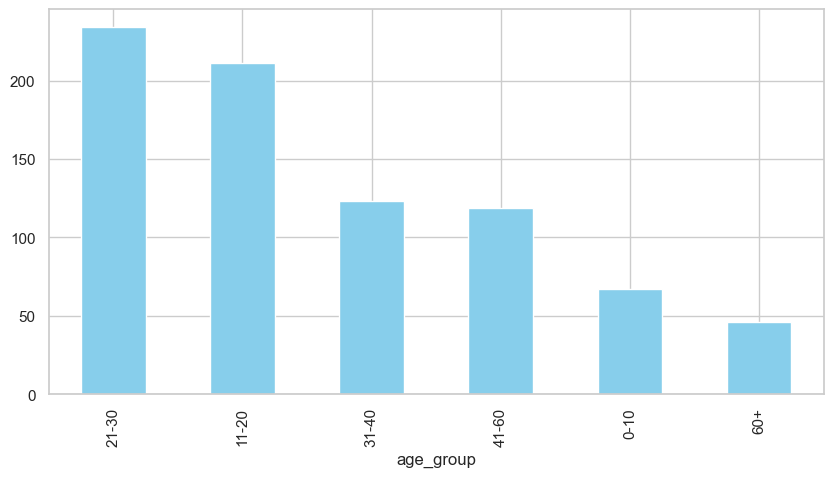

In [17]:
# This is a good way to visualize the distribution of the age column.
# We can also use the value_counts method to get a better view of the distribution.
# Experiment try different visualization methods to see what works best for you.
# Dont be afraid to try different visualization methods.
# Even after we bin the data into smaller intervals we can still see that the age column is normally distributed with a slight skew to the right.
# This means that most of the data is concentrated around the mean, with a few outlierson the right side.
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 60, 100], labels=['0-10','11-20','21-30','31-40','41-60','60+'])
df['age_group'] = df['age_group'].astype(str)
df['age_group'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')

<Axes: >

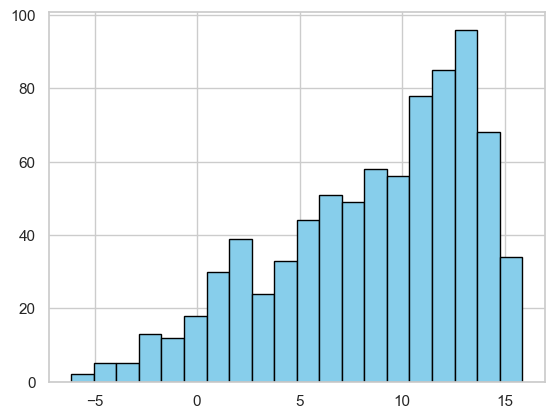

In [18]:
# We can also visualize the distribution of the result column.
# This helps in understanding the distribution of the result column and identifying any potential outliers or anomalies
df['result'].hist(bins=20, color='skyblue', edgecolor='black')
#df['result'].describe()
#df['result']

### We use boxplots to identify outliers then we filter out uneccessary rows based on those values that lay below the q1 or above the q3.

Text(0.5, 1.0, 'Box Plot of Result')

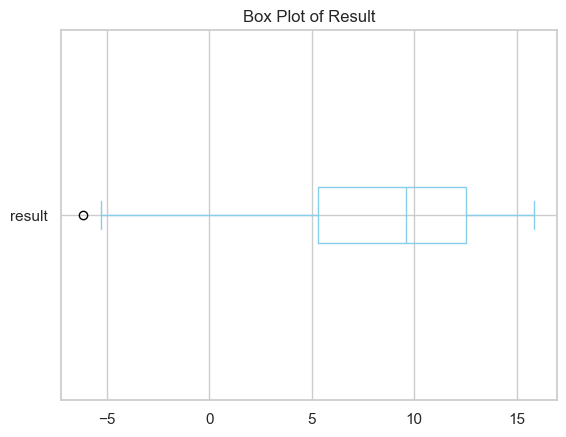

In [19]:
# Identifying outliers in the result column using a box plot.
df['result'].plot(kind='box', color='skyblue', vert=False)
plt.title('Box Plot of Result')

### Example. Look at where the outlier lies below and look at how we filters the rows based on this.
### `python` df = df[df['result']>-5]
because we plan on to do log transformations on the age column we only filter out the outliers in the result column.
Remember after visualize the categorical features do not forget to do transform the age column and filter out the outliers
also check the distribution of the age column after you perform the transformations.


### 4.4 Categorical Features

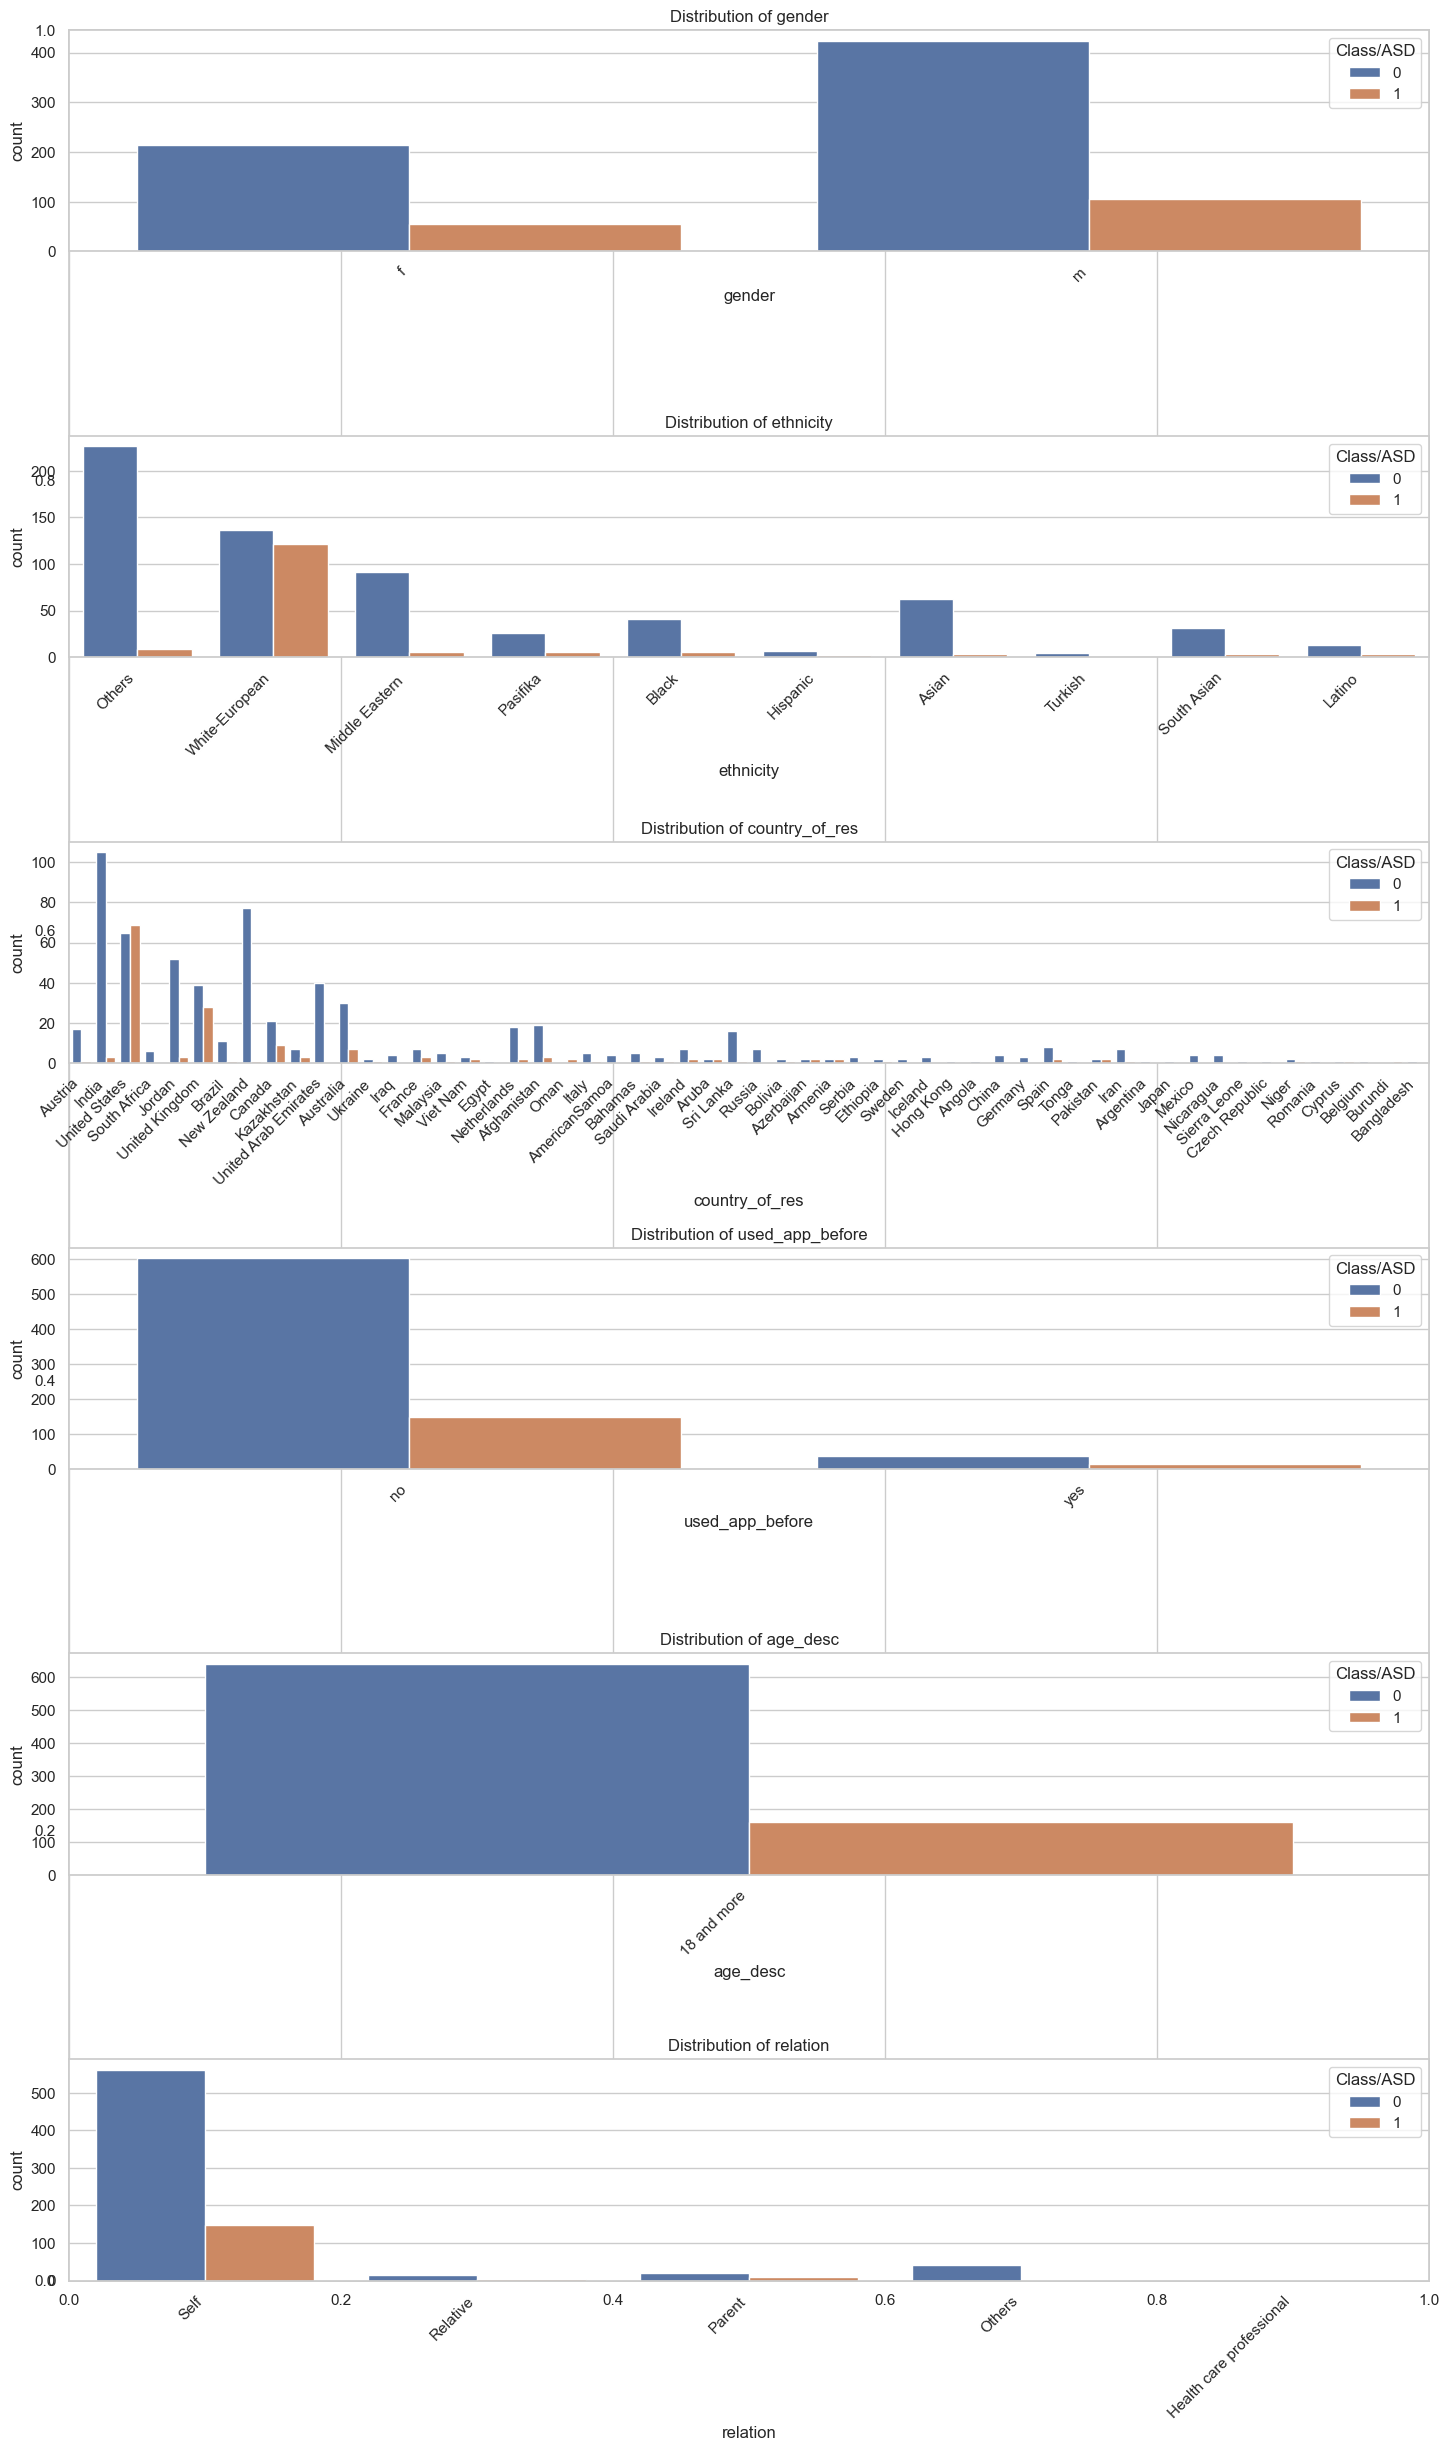

In [20]:
plt.subplots(figsize=(15, 25))
for i, col in enumerate(objects):
    plt.subplot(len(objects), 1, i+1)
    sb.countplot(x=col, hue='Class/ASD', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Amongst all the Ethnic groups White Europeans also had the most cases of Autism.

<Axes: xlabel='ethnicity'>

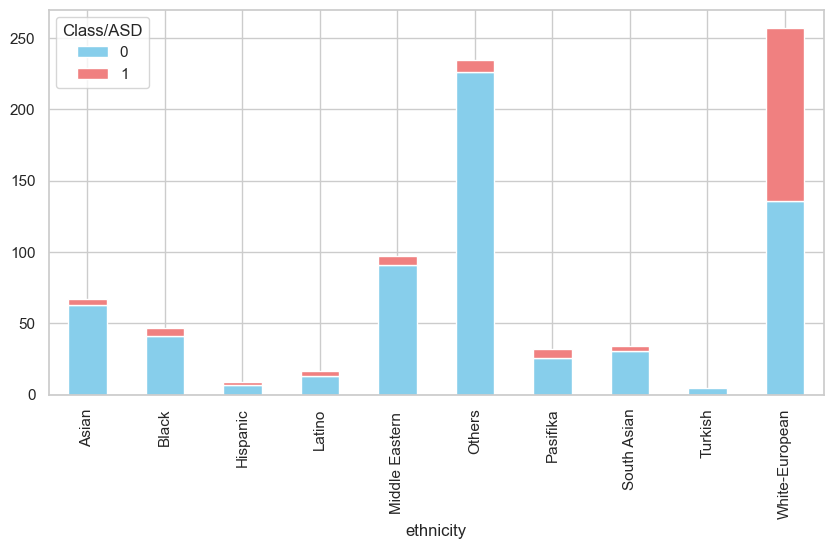

In [21]:
df.groupby('ethnicity')['Class/ASD'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'lightcoral'])

### For Some Reason the US has the most Autism cases according to the data. The Stacked charts show you the distribution between the classes.

<Axes: xlabel='country_of_res'>

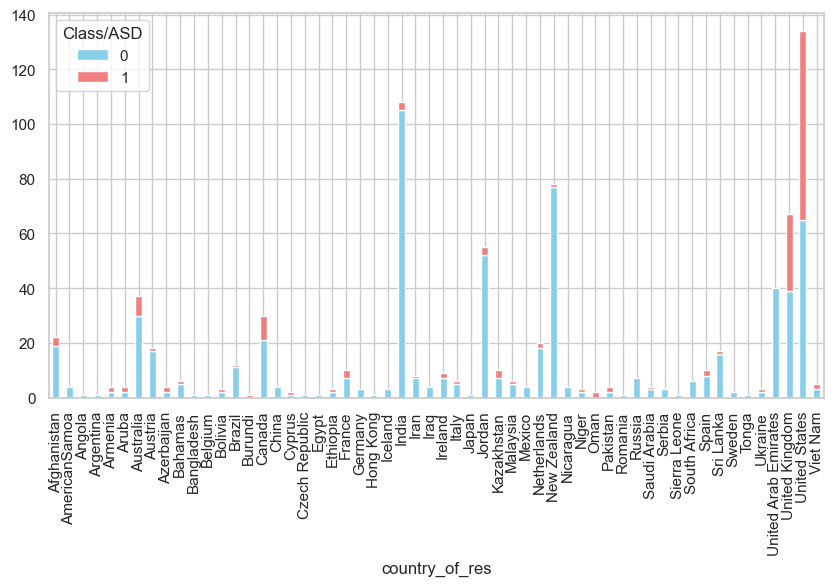

In [23]:
df.groupby(['country_of_res'])['Class/ASD'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'lightcoral'])

### Jaundice is a condition characterized by the yellowing of the skin and whites of the eyes due to a buildup of bilirubin in the body. Yes I took the 1.5 seconds to look that up because I wanted to understand my data and what the condition was and how it might have statistical importance in this dataset.

<Axes: xlabel='jaundice'>

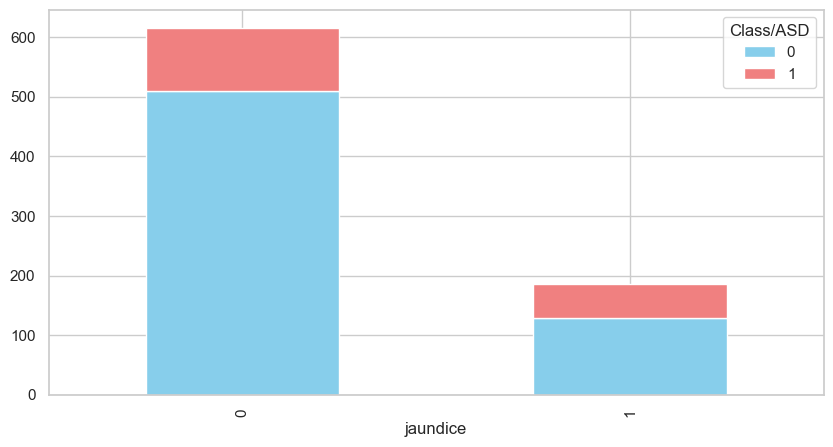

In [91]:
df.groupby('jaundice')['Class/ASD'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'lightcoral'])

### The Distribution between gender and Class/ASD is not balanced.
* Theres more male classified as non-ASD than ASD.
* This could be a potential bias in the dataset.

<Axes: xlabel='Class/ASD'>

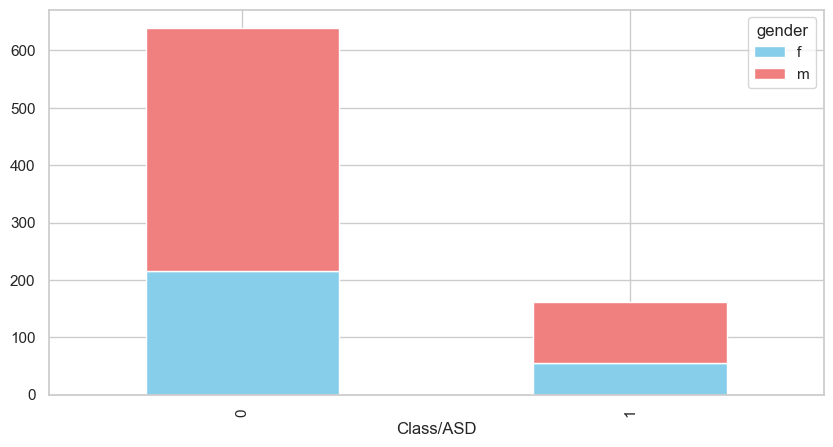

In [24]:
# The Distribution between gender and Class/ASD is not balanced.
# Theres more male classified as non-ASD than ASD.
# This could be a potential bias in the dataset.
# The same is true for female classified as non-ASD than ASD.
# We can visualize this using a stacked bar chart.

df.groupby('Class/ASD')['gender'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'lightcoral'])

#### 4.5 This Leads me to having to resample the data so the class imbalance will even out. We also get into Feature Engineering. 
🔧 What Is Feature Engineering?
Feature Engineering is the process of:

Creating, modifying, or selecting input variables ("features") that improve a machine learning model’s ability to learn meaningful patterns from data.

It includes:

Creating new features

Transforming existing ones

Encoding categorical variables

Handling missing values

Scaling or normalizing

Combining or reducing dimensions

* We will filter out our data to get rid of the outliers from the result column, we will perform log transformations 
on the age column to reduce the skewness of the data, we will create a new column from combining multiple columns then check for high correlation on the target column and we will also perform a standardization of the data.

Text(0.5, 1.0, 'Histogram of Age after Log Transformation')

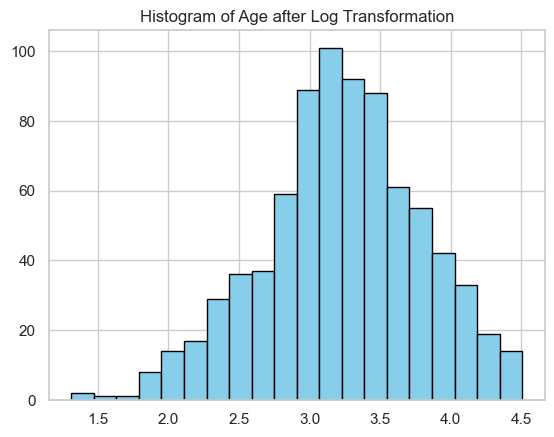

In [25]:
# Check the shape before filtering out the outliers in the result column.
# This helps in understanding the number of rows and columns in the dataset before filtering out the outliers.
#df.shape
# also you can see how many rows and columns we have in the dataset before filtering out the outliers.
#df[df['result']>-5].shape
df = df[df['result']>-5]
df['age_transformed'] = np.log1p(df['age'])
df['age_transformed'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age after Log Transformation')


In [27]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,age_group,age_transformed
0,1,1,0,1,0,1,0,1,0,1,...,0,0,Austria,no,6.351166,18 and more,Self,0,31-40,3.667981
1,2,0,0,0,0,0,0,0,0,0,...,0,0,India,no,2.255185,18 and more,Self,0,41-60,3.886716
2,3,1,1,1,1,1,1,1,1,1,...,0,1,United States,no,14.851484,18 and more,Self,1,0-10,2.125892
3,4,0,0,0,0,0,0,0,0,0,...,0,0,United States,no,2.276617,18 and more,Self,0,21-30,3.201198
4,5,0,0,0,0,0,0,0,0,0,...,0,0,South Africa,no,-4.777286,18 and more,Self,0,41-60,3.788856


### After the log transformation the data takes on normality.

### Lets look for correlation Analysis. We can do that with Scatter plots or a heatmap. Even we can use the correlation method.

In [34]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD',
       'age_group', 'age_transformed', 'sum_score'],
      dtype='object')

<Axes: xlabel='age_group'>

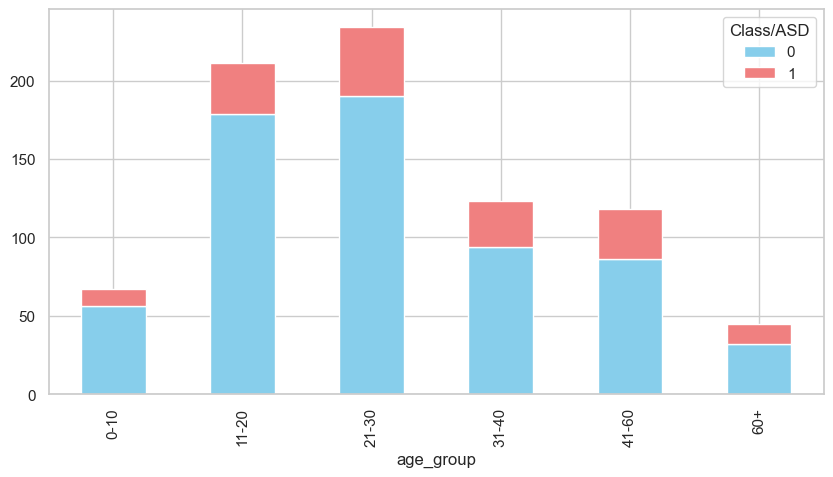

In [30]:
df.groupby('age_group')['Class/ASD'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'lightcoral'])

## 🧠 What is Multicollinearity?
Multicollinearity happens when two or more features are highly correlated with each other. This can:

Confuse linear models like Logistic Regression

Inflate coefficient estimates (making them unstable)

Make feature importance unreliable

After we create some feature we are gonna check Multi Collinearity by using the heatmap and looking for 

values > 0.9 because that would make them redundant so we drop them. We can also use a more statistical approach

using the Variance Inflation Factor (VIF) which is a measure of how much the variance is increase because of 

collinearity among the predictor variables.

In [36]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,age_group,age_transformed,sum_score
0,1,1,0,1,0,1,0,1,0,1,...,0,Austria,no,6.351166,18 and more,Self,0,31-40,3.667981,1
1,2,0,0,0,0,0,0,0,0,0,...,0,India,no,2.255185,18 and more,Self,0,41-60,3.886716,0
2,3,1,1,1,1,1,1,1,1,1,...,1,United States,no,14.851484,18 and more,Self,1,0-10,2.125892,1
3,4,0,0,0,0,0,0,0,0,0,...,0,United States,no,2.276617,18 and more,Self,0,21-30,3.201198,0
4,5,0,0,0,0,0,0,0,0,0,...,0,South Africa,no,-4.777286,18 and more,Self,0,41-60,3.788856,0


In [ ]:
# Remeember we create functions to avoid code duplication and make our code more readable and maintainable.
# This is a good practice in programming and helps in reducing the complexity of the code.
# We can also use functions to perform complex operations in a single line of code.
def add_feature(data):
# Creating a column with all values zero
    df['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:

# Updating the 'sum_score' value with scores
# from A1 to A10
        df['sum_score'] += data[col]
# Creating a random data using the below three columns
        df['ind'] = df['autism'] + df['used_app_before'] + df['jaundice']

    return df

df = add_feature(df)
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,age_group,age_transformed,sum_score,ind
0,1,1,0,1,0,1,0,1,0,1,...,Austria,0,6.351166,18 and more,Self,0,31-40,3.667981,6,0
1,2,0,0,0,0,0,0,0,0,0,...,India,0,2.255185,18 and more,Self,0,41-60,3.886716,0,0
2,3,1,1,1,1,1,1,1,1,1,...,United States,0,14.851484,18 and more,Self,1,0-10,2.125892,10,1
3,4,0,0,0,0,0,0,0,0,0,...,United States,0,2.276617,18 and more,Self,0,21-30,3.201198,0,0
4,5,0,0,0,0,0,0,0,0,0,...,South Africa,0,-4.777286,18 and more,Self,0,41-60,3.788856,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,New Zealand,0,12.999501,18 and more,Self,0,11-20,2.867739,3,0
796,797,0,1,1,0,0,1,0,1,1,...,Cyprus,0,13.561518,18 and more,Self,0,21-30,3.077451,6,0
797,798,0,0,0,0,0,0,0,0,0,...,New Zealand,0,2.653177,18 and more,Self,0,0-10,1.903820,0,1
798,799,0,0,0,0,0,0,0,0,0,...,Canada,0,9.069342,18 and more,Self,0,11-20,2.857292,0,0


<Axes: xlabel='ind'>

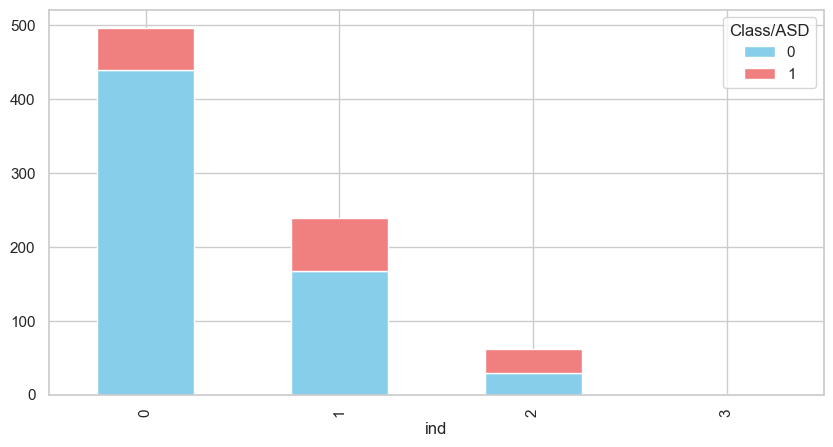

In [48]:
#df['ind'].plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
df.groupby('ind')['Class/ASD'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'lightcoral'])

<Axes: xlabel='ethnicity'>

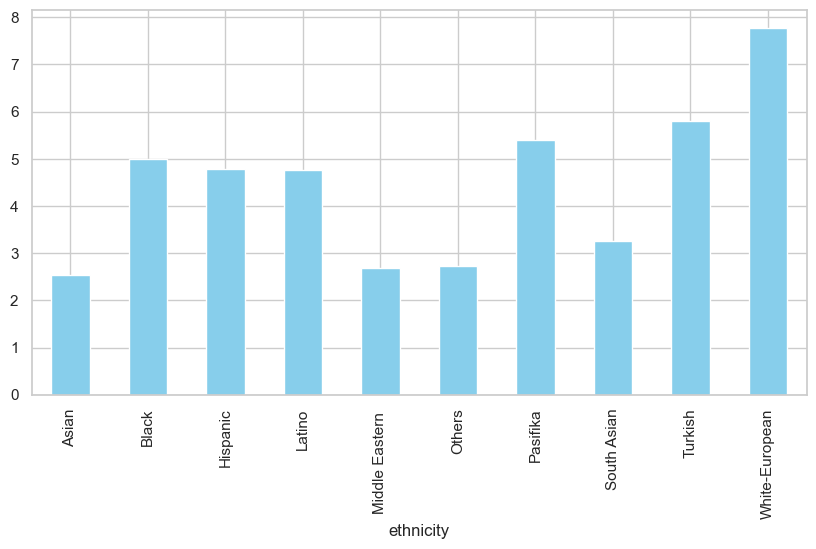

In [52]:
df.groupby('ethnicity')['sum_score'].mean().plot(kind='bar', figsize=(10, 5), color='skyblue')

### It seems as if our sum_score column we created is giving us even more information and value but we still have to check for multicollinearity.

<Axes: xlabel='age_group'>

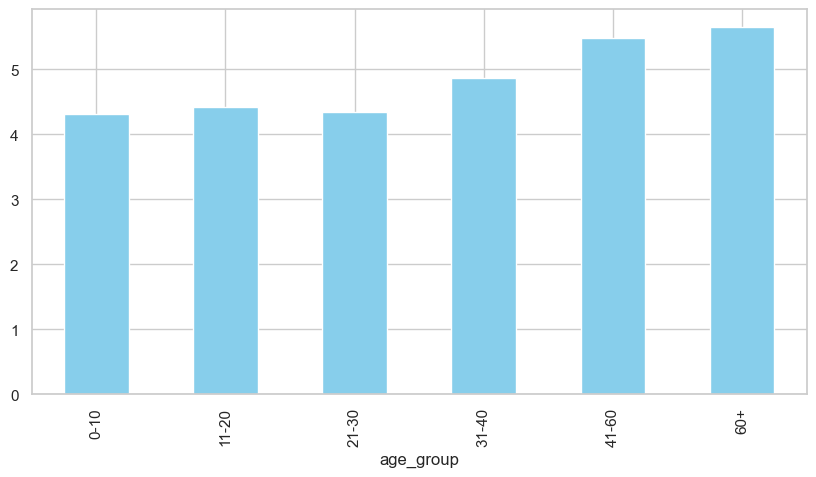

In [53]:
df.groupby('age_group')['sum_score'].mean().plot(kind='bar', figsize=(10, 5), color='skyblue')

### Countries actually outside of the US have the highest sum_scores particularly in india.

<Axes: xlabel='country_of_res'>

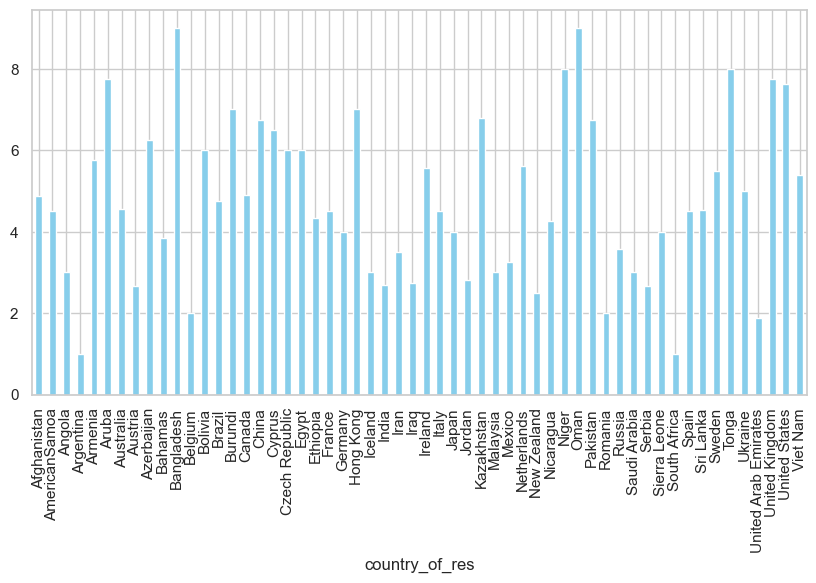

In [54]:
df.groupby('country_of_res')['sum_score'].mean().plot(kind='bar', figsize=(10, 5), color='skyblue')

### Lets Visually Represent our new Features also.

<Axes: xlabel='gender'>

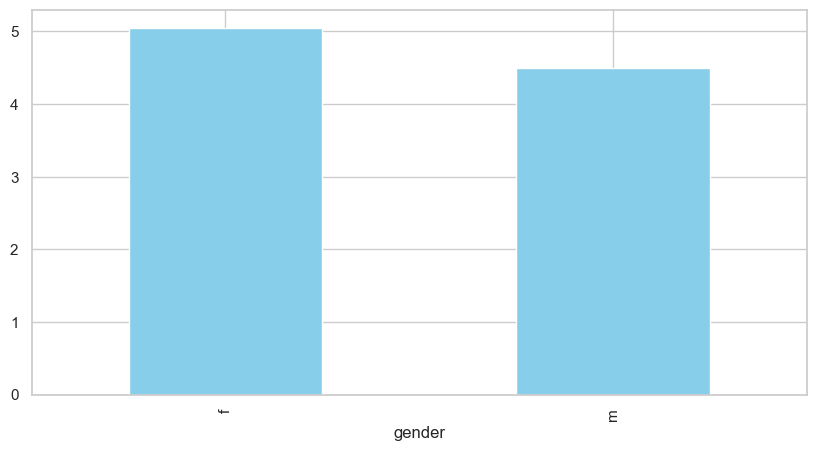

In [55]:
df.groupby('gender')['sum_score'].mean().plot(kind='bar', figsize=(10, 5), color='skyblue')

### Even tho our column gender is imbalanced in relation to our target column(class/asd)
### meaning male samples dominated the class, collectively the females still had highere sum_scores !

<Axes: xlabel='sum_score', ylabel='count'>

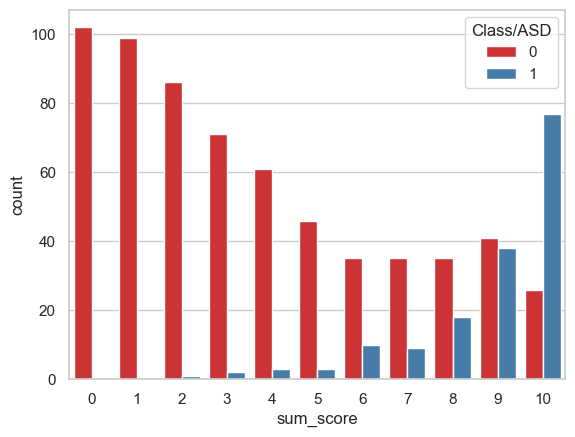

In [62]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'], palette='Set1')

### More statistical takeaways from the feature engineering. Higher sum scores are associated with increased autism classifications. Focus on sum score 10.

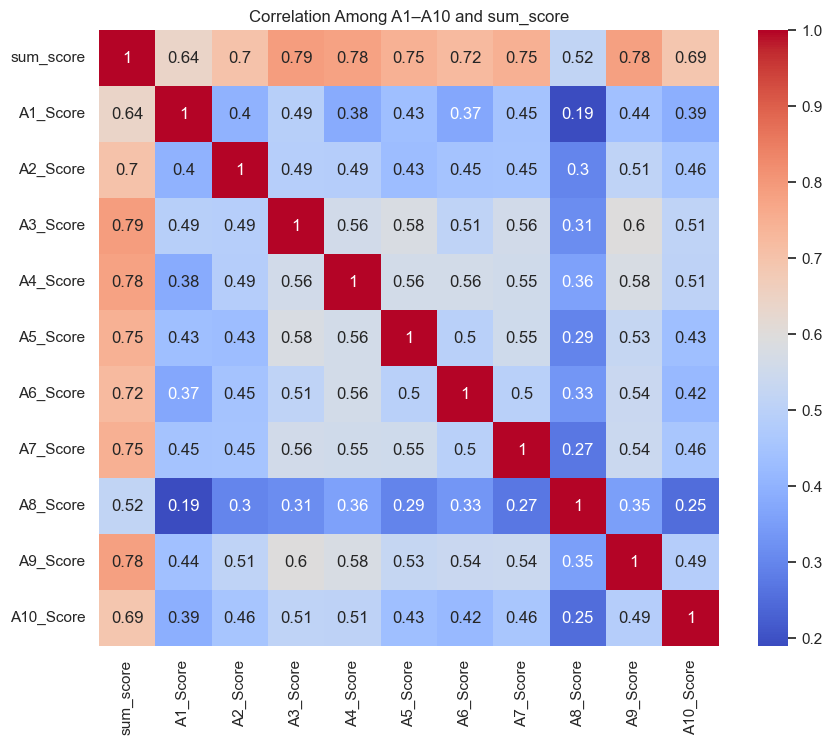

In [56]:
# Correlation Matrix to check for multicollinearity
# This helps in understanding the correlation between the features and the target variable.
features_to_check = ['sum_score'] + [f'A{i}_Score' for i in range(1, 11)]
corr_matrix = df[features_to_check].corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Among A1–A10 and sum_score")
plt.show()


VIF > 5 = mild collinearity

VIF > 10 = problematic

Drop one of the redundant features
🔍 What Causes VIF = ∞
The VIF is infinite when there are duplicate features in the dataset. This is because the correlation betwe
en a feature and itself is 1, which leads to an infinite VIF.

* If a feature is perfectly predicted by the others → 𝑅2=→ VIF = ∞
### This is just another statistical example other than the heatmap.


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['sum_score'] + [f'A{i}_Score' for i in range(1, 11)]]
X = add_constant(X)

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


      feature       VIF
0       const  3.679848
1   sum_score       inf
2    A1_Score       inf
3    A2_Score       inf
4    A3_Score       inf
5    A4_Score       inf
6    A5_Score       inf
7    A6_Score       inf
8    A7_Score       inf
9    A8_Score       inf
10   A9_Score       inf
11  A10_Score       inf


### In this next heatmap we gonna check for correlation on all numerical columns then drops uneccessary columns.

In [ ]:
# Checking to see the categorical columns and their data types.
# I plan on transforming the categorical columns into numerical columns using Label Encoding.
# This helps in understanding the structure of the dataset and identifying any potential issues with data types.
# also I can plot the heatmap to see the correlation between the categorical columns and the target variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    object 
 13  ethnicity        798 non-null    object 
 14  jaundice         798 non-null    int64  
 15  autism           798 non-null    int64  
 16  country_of_res   798 non-null    object 
 17  used_app_before  798 

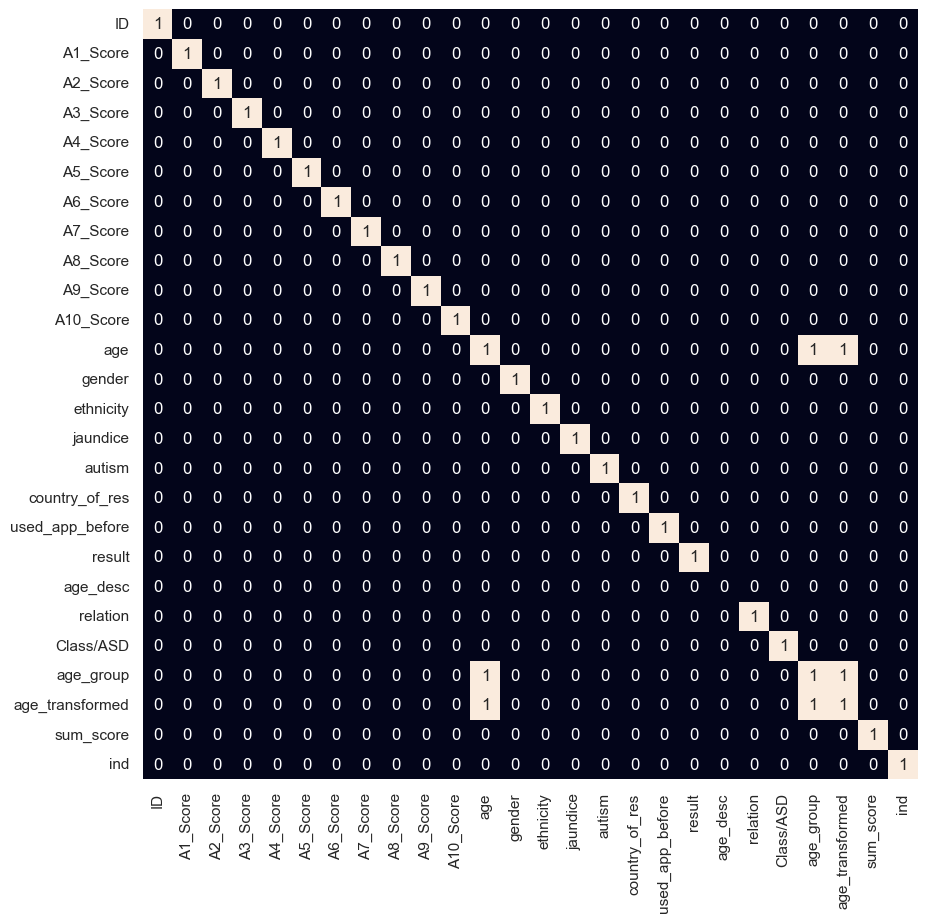

In [71]:
def encode_labels(data):
    for col in data.columns:

# Here we will check if datatype
# is object then we will encode it
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False,)
plt.show()

### So its a toss up on dropping one of the ages, either group or age , id lets drop a few and re visualize our heatmap.
Look at the maching 1's.

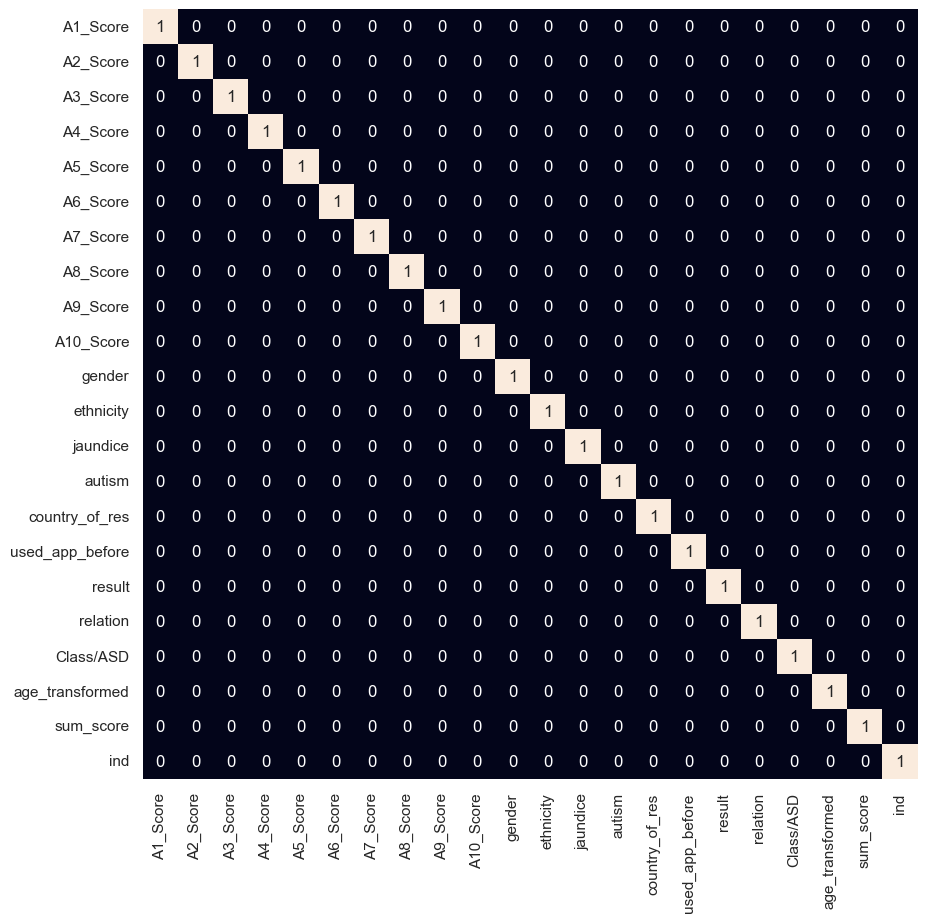

In [74]:
removal = ['ID', 'age_desc', 'age','age_group']
heatmap_df = df.drop(columns=removal)
plt.figure(figsize=(10,10))
sb.heatmap(heatmap_df.corr() > 0.8, annot=True, cbar=False)
plt.show()



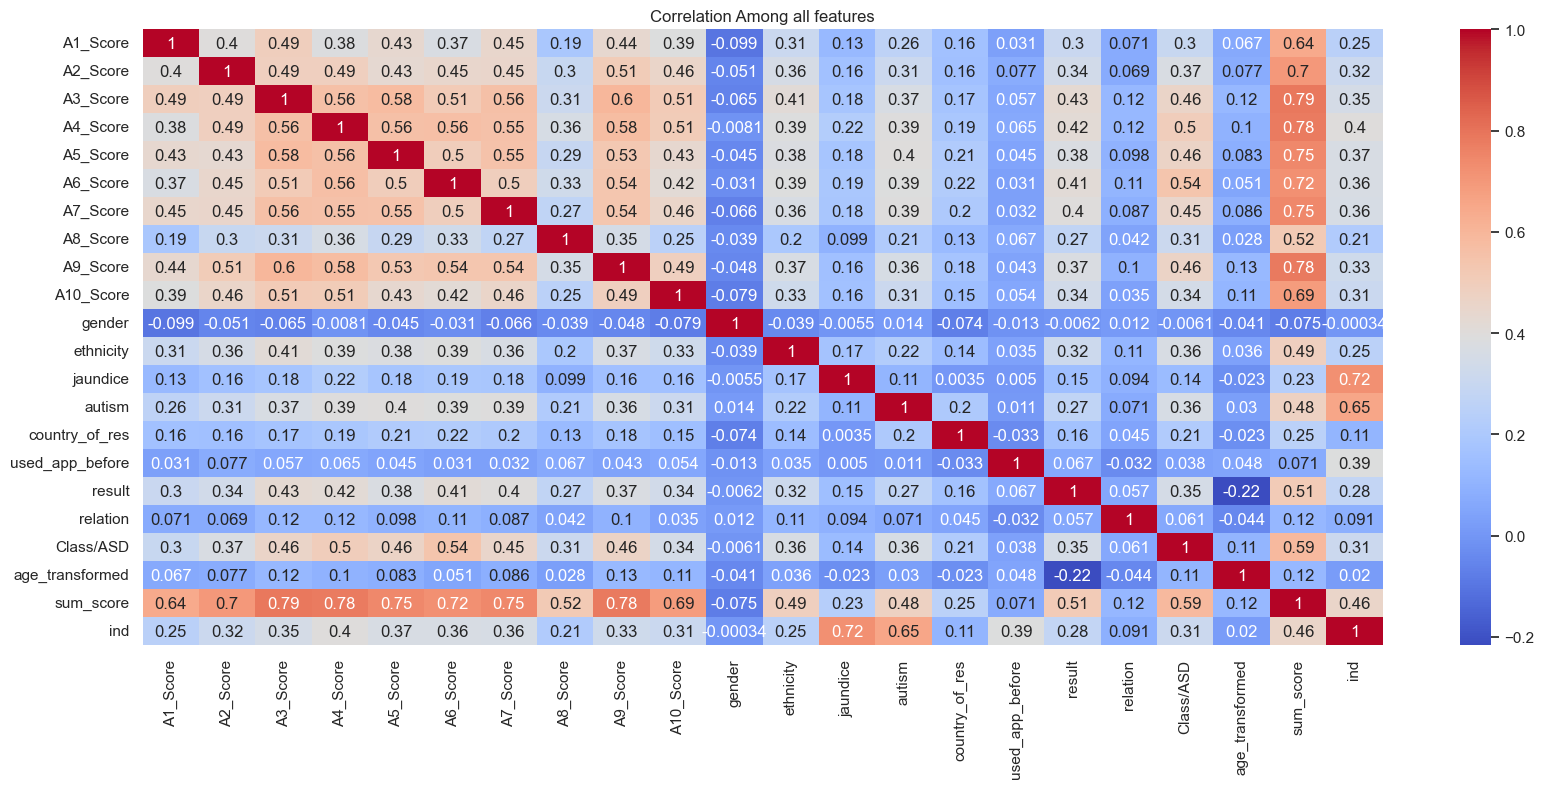

In [77]:
removal = ['ID', 'age_desc', 'age','age_group']
corr_matrix = df.drop(columns=removal).corr()
#corr_matrix = df.corr()

plt.figure(figsize=(20, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Among all features")
plt.show()

### This final heatmap is confirming the columns I want to use in this Model.

## 5. Data Preparation for Modeling

In [80]:
# Drop ID column
df = df.drop(columns=['ID', 'age_desc', 'age','age_group'])

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

# Balance dataset using oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Model Training and Evaluation

In [81]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred))
    print("="*40)

In [82]:
# Logistic Regression
evaluate_model(LogisticRegression(), "Logistic Regression")

# Support Vector Machine
evaluate_model(SVC(), "Support Vector Machine")

# XGBoost Classifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")

Model: Logistic Regression
Accuracy: 0.8392156862745098
Precision: 0.8134328358208955
Recall: 0.872
F1 Score: 0.8416988416988417
Model: Support Vector Machine
Accuracy: 0.9058823529411765
Precision: 0.8435374149659864
Recall: 0.992
F1 Score: 0.9117647058823529
Model: XGBoost
Accuracy: 0.9490196078431372
Precision: 0.9057971014492754
Recall: 1.0
F1 Score: 0.9505703422053232


✅ 1. Accuracy
“Out of all predictions, how many did we get right?”

* ​But — accuracy can be misleading in imbalanced datasets.

* Example:
If 90% of people are non-ASD and your model always predicts "non-ASD" → 90% accuracy… but it's useless!


✅ 2. Precision
“When the model says someone has ASD, how often is it correct?”


* 📌 High precision = few false alarms
🔍 Use when false positives are costly (e.g., overdiagnosing someone)


✅ 3. Recall (Sensitivity)
“Out of all people who actually have ASD, how many did the model catch?”


✅ 4. F1 Score
“Balanced score between precision and recall”


* 📌 Best when classes are imbalanced and you care about both false positives and false negatives
takes

🧠 Summary
Metric	Use When…

* Accuracy	Data is balanced and you want an overall score

* Precision	You want to avoid false positives

* Recall	You want to catch every ASD case (no misses!)

* F1 Score	You want a balanced metric that handles class imbalance well

## 7. Feature Importance (XGBoost)

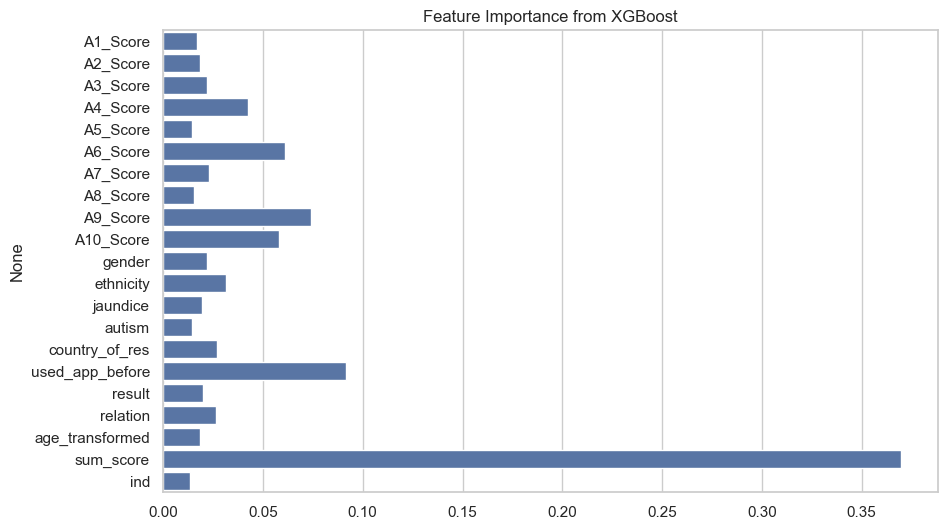

In [83]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

importance = model.feature_importances_
features = df.drop(columns=['Class/ASD']).columns

# Plot
plt.figure(figsize=(10, 6))
sb.barplot(x=importance, y=features)
plt.title("Feature Importance from XGBoost")
plt.show()

### Sum score derived from adding other features actually had the most influence in our Model signifying it was very influential. Also Remember the Column "ind" is just some random column we created that was derived from adding other numerical columns. Another example of this could be multiplying or squaring the values also.

## 8. Conclusion & Next Steps

- The best-performing model can be selected based on F1-score.
- `A1_Score` to `A10_Score` seem to play a major role in prediction.
- With more data, we could try ensemble techniques or deep learning.

**Next Steps:**
- Test on a real-world validation dataset.
- Build a simple Streamlit app for user interaction.
- Add SHAP for explainability.